"""BigMartSalesPrediction.ipynb

Automatically generated by Colab.

Original file located at
    https://colab.research.google.com/drive/1pGUpjAI9n9XrknlVD_ahEVlinzc-_ik2

Problem Statement:
**BigMart Sales Prediction!**
Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.




Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



Train file: CSV containing the item outlet information with sales value.


The task is to predict Item_Outlet_Sales - which is a regression problem
"""

In [1]:
# Import the pandas library
import pandas as pd
import numpy as np
import joblib

In [2]:
# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [3]:
# Let's start with inspecting the shape of the data first
print("Shape of the training data:", train_df.shape)
print("Shape of the testing data:", test_df.shape)

Shape of the training data: (8523, 12)
Shape of the testing data: (5681, 11)


"""- Approximately good size of data is available in test scenario.
- 1 column is missing in the test data
"""

In [4]:
print("\n--- Training Data Info ---")
print(train_df.info())


--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [5]:
train_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


"""- in total 8523 rows of records we can see few columns like Item_Weight and Outlet_Size are having null values"""

In [6]:
print("\n--- Testing Data Info ---")
print(test_df.info())


--- Testing Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [7]:
test_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


"""similar columns are having null values in the test dataset as well"""

In [8]:
# Display the first few rows of the training data
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


"""- Before imputing the null value columns, lets understand the data in the corresponding columns"""

In [9]:
train_df['Item_Weight'].value_counts()

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.920,2
6.520,1
9.420,1


<Axes: title={'center': 'Item_Weight'}, xlabel='Item_Weight'>

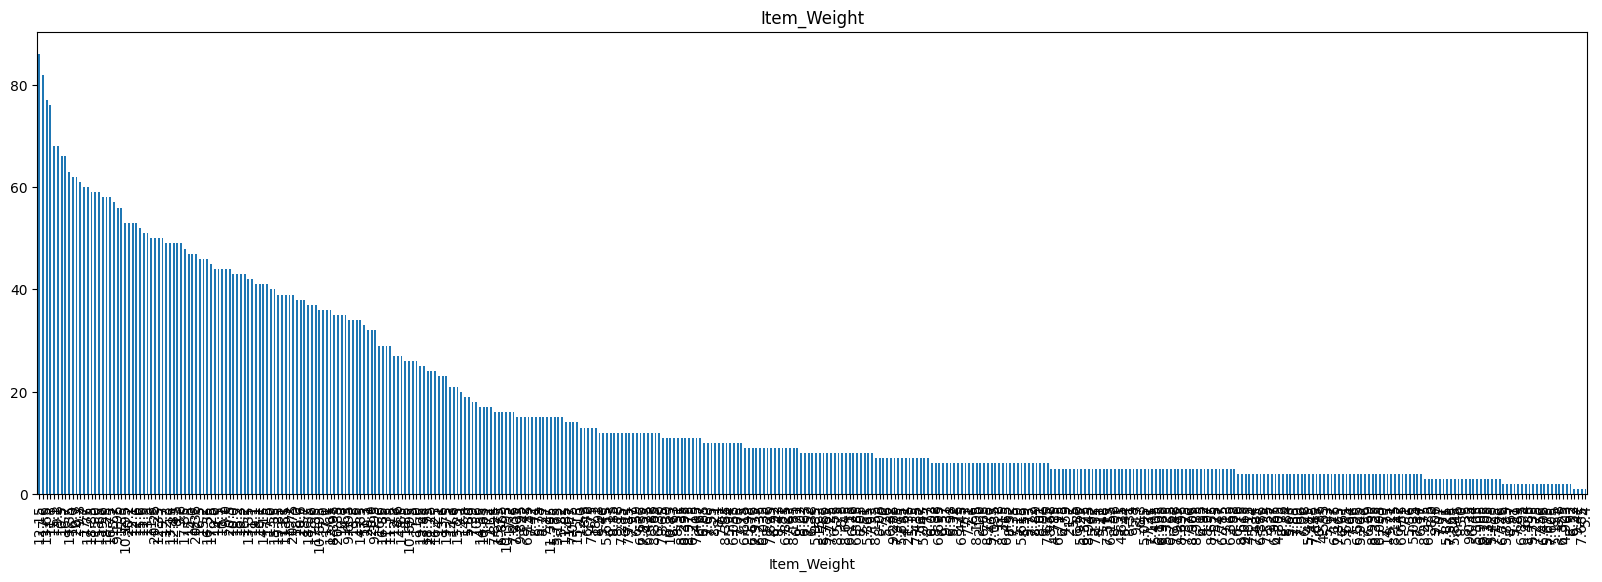

In [10]:
train_df['Item_Weight'].value_counts().plot(kind='bar', title='Item_Weight',figsize=(20,6))

"""- if we are going to impute based on the item weight alone, it will not be clear view. We need Item identifier or the item type to make a clear group scenario to impute the values for item_weight feature.
- Using both makes it redundant. instead of the item type which is broader scope, we can go ahead with the item identifier in our scenario
"""

In [11]:
train_df.groupby('Item_Identifier')['Item_Weight'].value_counts()

,,count
Item_Identifier,Item_Weight,
DRA12,11.600,6
DRA24,19.350,5
DRA59,8.270,6
DRB01,7.390,2
DRB13,6.115,5
...,...,...
NCZ30,6.590,6
NCZ41,19.850,5
NCZ42,10.500,5


In [12]:
# Now Lets Fill the missing Item_Weight values in train and test dataframes
# As per our decision we plan to use item identifier along to find the mean value for item weight imputation
train_df['Item_Weight'] = train_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
test_df['Item_Weight'] = test_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [13]:
# Verifying that there are no more missing values in Item_Weight
print(train_df['Item_Weight'].isnull().sum())
print(test_df['Item_Weight'].isnull().sum())

4
20


In [14]:

train_df[train_df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [15]:
train_df[train_df['Item_Identifier'].isin(['FDN52','FDK57','FDE52','FDQ60'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


"""- we see that there is only one item identifier and its weights are null. to further impute this data, we go for straight forward approach. where we will find mean for broader group like item type and apply it in null values"""

In [16]:
# Create a dictionary of mean weights for each item type
# This is a good way to pre-calculate the values you need.
item_type_means = train_df.groupby('Item_Type')['Item_Weight'].transform('mean')

In [17]:
# Fill the remaining nulls in Item_Weight with the mean of its Item_Type
# Use direct assignment to ensure the change is made on the original DataFrame.
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(item_type_means)

In [18]:
# Do the same for the test data
item_type_means_test = test_df.groupby('Item_Type')['Item_Weight'].transform('mean')
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(item_type_means_test)

In [19]:
# Verify that there are no more missing values in Item_Weight
print(train_df['Item_Weight'].isnull().sum())
print(test_df['Item_Weight'].isnull().sum())

0
0


"""-Now lets move to next column Outlet_Size"""

In [20]:
train_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [21]:
train_df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [22]:
train_df[['Outlet_Size','Outlet_Type']].value_counts()

Outlet_Size  Outlet_Type      
Small        Supermarket Type1    1860
Medium       Supermarket Type3     935
High         Supermarket Type1     932
Medium       Supermarket Type1     930
             Supermarket Type2     928
Small        Grocery Store         528
Name: count, dtype: int64

In [23]:
train_df['Outlet_Size'].isnull().sum()

np.int64(2410)

In [24]:
train_df.groupby('Outlet_Type')['Outlet_Size'].value_counts()


Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

"""- Lets take it as straight forward scenario. directly impute it using mode based on the relationship between the outlet type and putle size"""

In [25]:
# Function to fill missing Outlet_Size values with the mode for each Outlet_Type
def fill_missing_outlet_size(df):
  for outlet_type in df['Outlet_Type'].unique():
    mode_size = df[df['Outlet_Type'] == outlet_type]['Outlet_Size'].mode()[0]
    df.loc[(df['Outlet_Type'] == outlet_type) & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = mode_size
  return df


In [26]:
# Apply the function to both dataframes
train_df = fill_missing_outlet_size(train_df)
test_df = fill_missing_outlet_size(test_df)

In [27]:
# Verify that there are no more missing values in Outlet_Size
print(train_df['Outlet_Size'].isnull().sum())
print(test_df['Outlet_Size'].isnull().sum())

0
0


In [28]:
print(train_df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


"""- Now data is ready

**Exploratory Data Analysis (EDA)**
"""

In [29]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Set a style for the plots
sns.set_style('whitegrid')

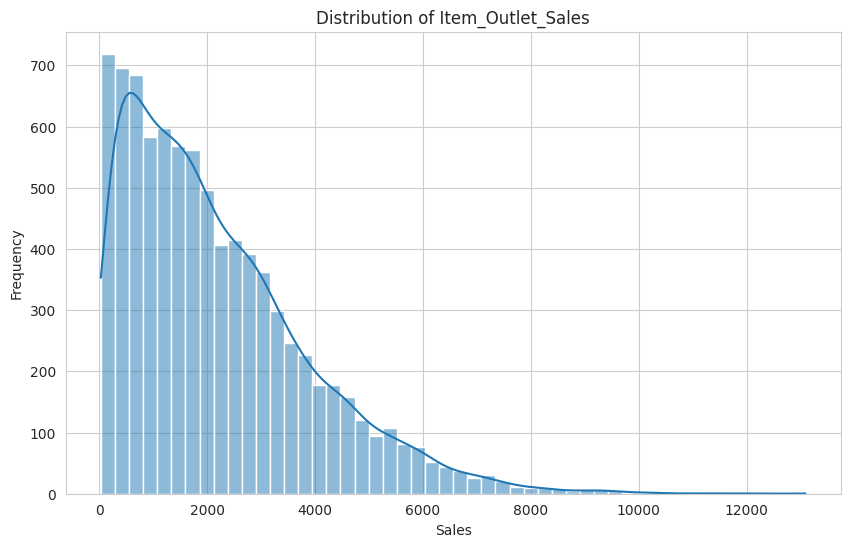

In [30]:
# Visualize the distribution of the target variable (Item_Outlet_Sales)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Item_Outlet_Sales'], bins=50, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

"""we can see that the plot is right skewed. it means that a large number of products have low sales, while a few products have very high sales."""

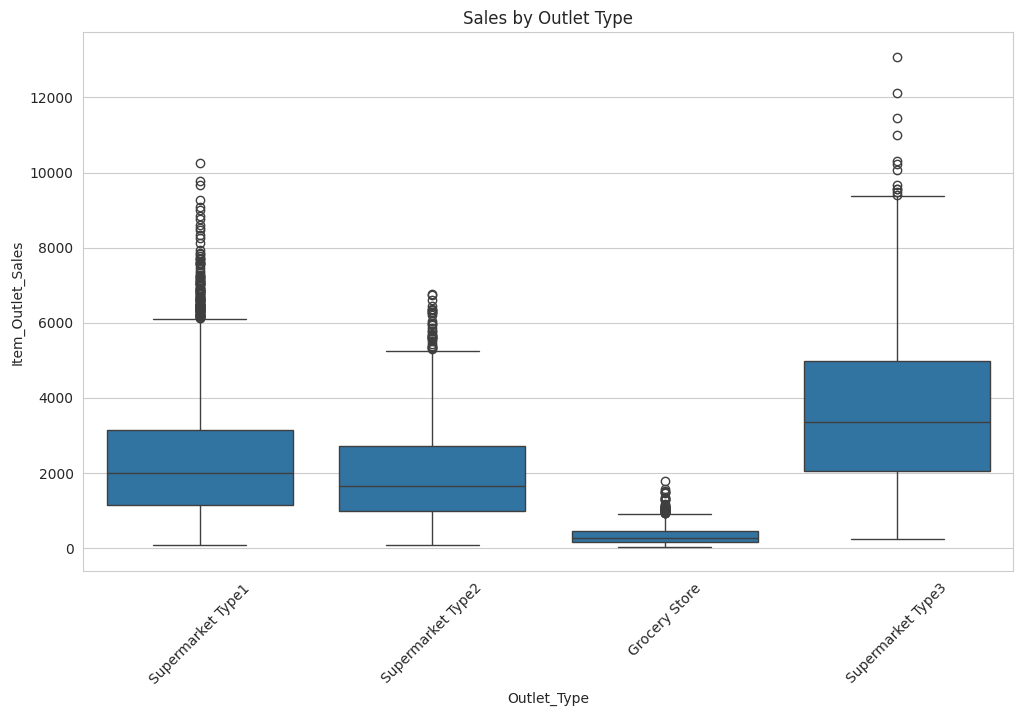

In [31]:
# Visualize sales across different Outlet_Type
plt.figure(figsize=(12, 7))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

"""It is clear that 'Supermarket Type3' outlets have the highest median sales and a very wide range, indicating high sales variability.
- 'Grocery Store' outlets have the lowest sales, with most sales figures being very low.
- 'Supermarket Type1' outlets show a consistent sales performance, and
- 'Supermarket Type2' is in between.

This tells us that Outlet_Type is a very important feature for predicting sales.
"""

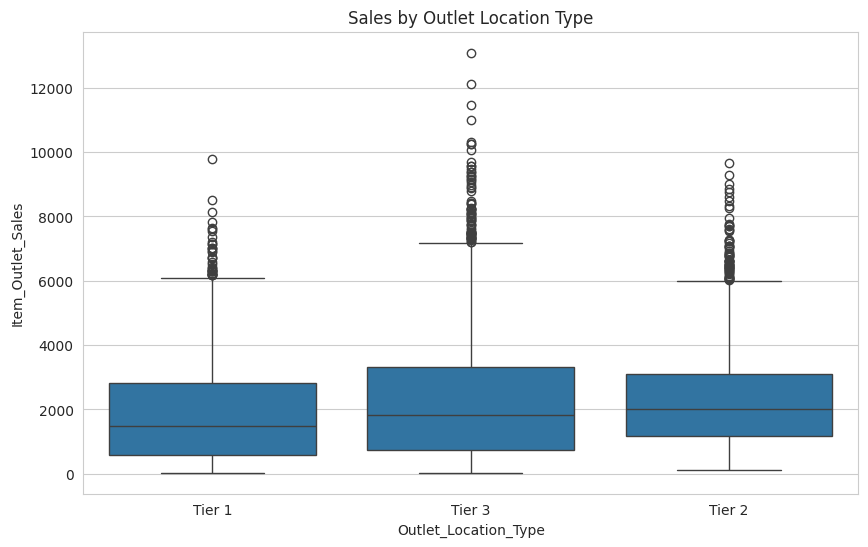

In [32]:
# Visualize sales across different Outlet_Location_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales by Outlet Location Type')
plt.show()

"""The box plot of sales by Outlet_Location_Type reveals a clear trend.
- 'Tier 1' outlets have the lowest median sales, while 'Tier 3' and 'Tier 2' outlets are closer.

This suggests that the geographical location of the store, possibly indicating the population density or economic status of the area, has a significant impact on sales.
"""

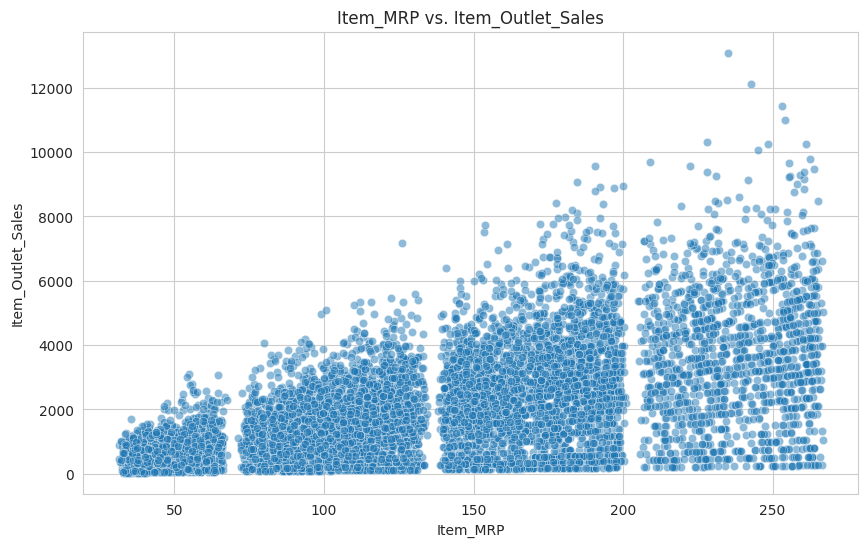

In [33]:
# Visualize the relationship between Item_MRP and Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df, alpha=0.5)
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.show()

"""The scatter plot between Item_MRP (Maximum Retail Price) and Item_Outlet_Sales shows some pattern. The data points seem to form four distinct clusters or price segments, indicating that items are priced in specific ranges. Within each price range, there's a general trend: as Item_MRP increases, Item_Outlet_Sales also tends to increase.

This suggests that expensive products often generate more revenue.
"""

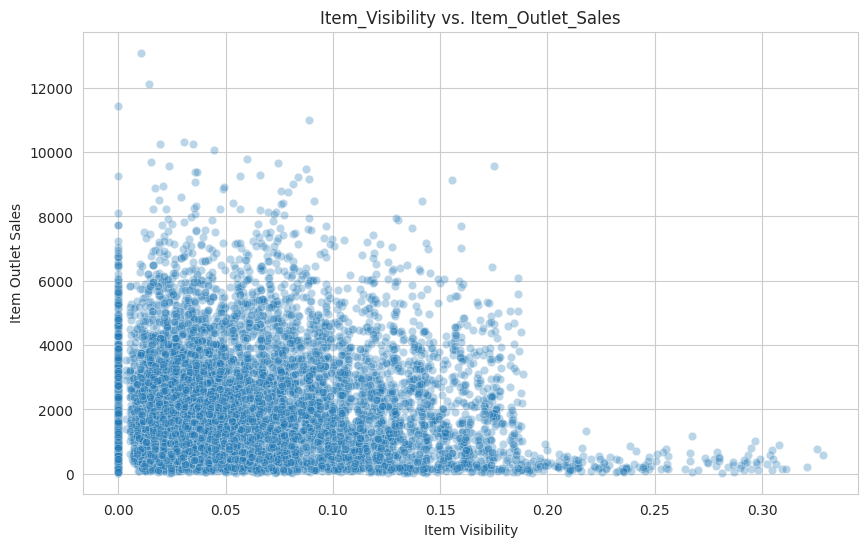

In [34]:
# --- Visualization: Item_Visibility vs. Item_Outlet_Sales ---

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_df, alpha=0.3)
plt.title('Item_Visibility vs. Item_Outlet_Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

"""- Item Visibility increases, item sales decreases"""

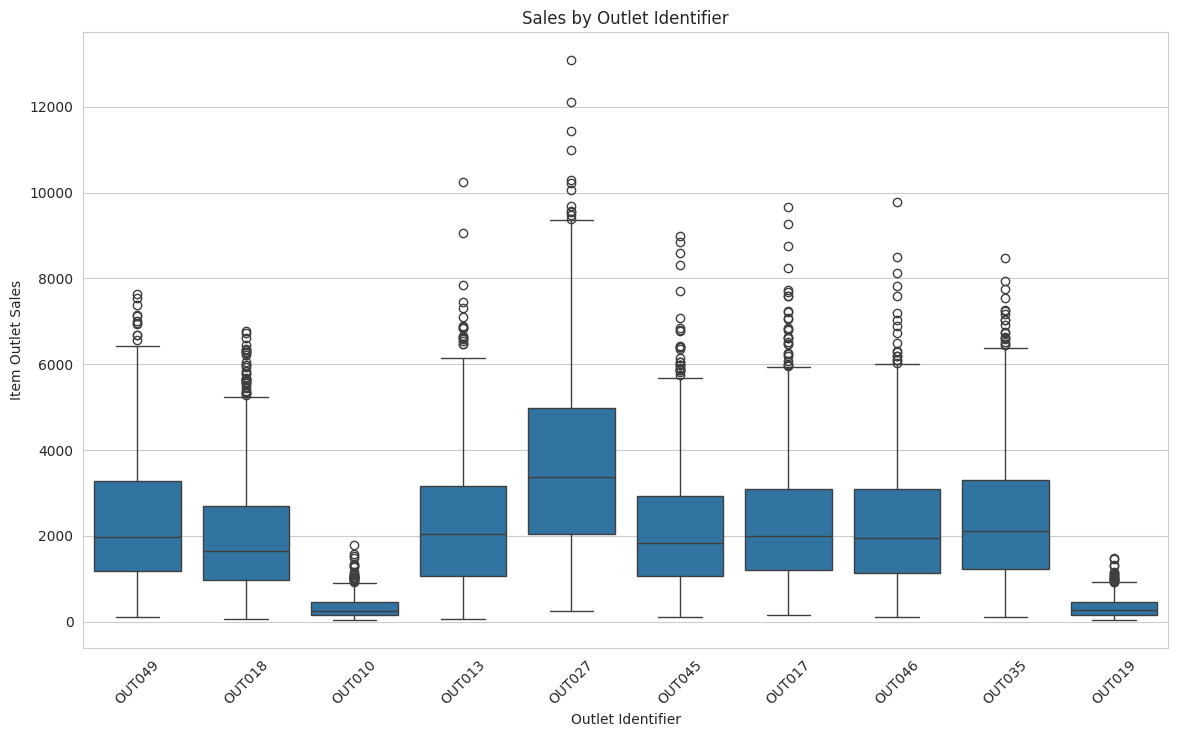

In [35]:
# --- Visualization: Outlet_Identifier vs. Item_Outlet_Sales ---
plt.figure(figsize=(14, 8))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales by Outlet Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

"""some outlets like OUT027 are high-performing and some of which are low-performing (OUT019, OUT10).
This confirms that store-level factors are crucial for sales prediction
"""

In [36]:
# --- Outlet_Age vs. Item_Outlet_Sales ---

train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']
test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']

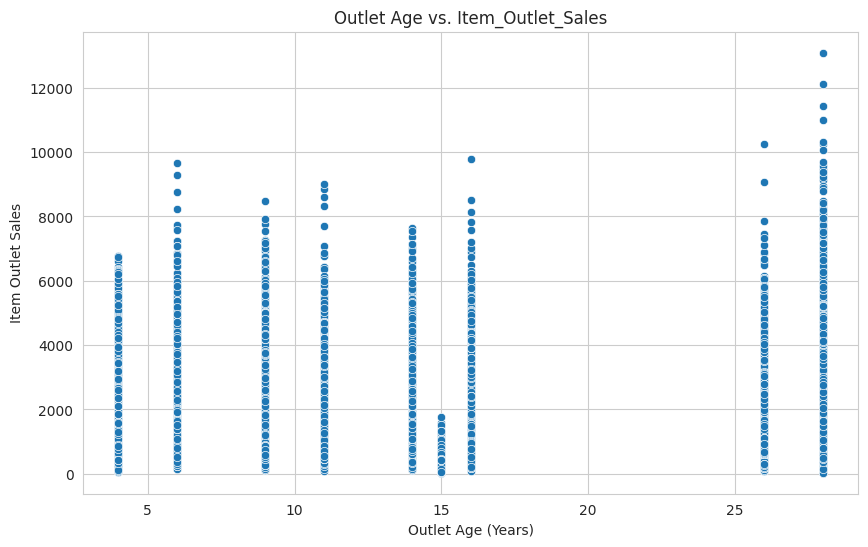

In [37]:
# Create a scatter plot to check the relationship between store age and sales.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outlet_Age', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet Age vs. Item_Outlet_Sales')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Item Outlet Sales')
plt.show()


"""Now Lets start with **Feature Engineering**

Major steps include
  - Categorical variable encoding
  - Scaling
  - Handling the skewed response data
"""

In [38]:
train_df['Item_Identifier_Prefix'] = train_df['Item_Identifier'].str[:2]

test_df['Item_Identifier_Prefix'] = test_df['Item_Identifier'].str[:2]

In [39]:
mapping_table = pd.crosstab(train_df['Item_Identifier_Prefix'], train_df['Item_Type'])
mapping_table


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Identifier_Prefix,,,,,,,,,,,,,,,,
DR,0,0,0,0,140,0,0,214,0,0,0,0,0,0,445,0
FD,648,251,110,649,542,856,1232,0,0,0,425,0,64,1200,0,148
NC,0,0,0,0,0,0,0,0,520,910,0,169,0,0,0,0


"""- we can see that the first 2 letters of the item identifier commonly represent some idea on products. like DR represent liquids, FD represents food items, NC represents other than food and drink.. lets take this as one of the feature"""

In [40]:
# Creating Item_MRP_Bins from Item_MRP
train_df['Item_MRP_Bins'] = pd.qcut(train_df['Item_MRP'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
test_df['Item_MRP_Bins'] = pd.qcut(test_df['Item_MRP'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [41]:
# Create Outlet_Age feature.
train_df['Outlet_Age'].head()

,Outlet_Age
0,14
1,4
2,14
3,15
4,26


In [42]:
# Drop unnecessary columns before encoding
train_df_preprocessed = train_df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'])
test_df_preprocessed = test_df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'])

In [43]:
## encoding columns selection

categorical_cols = [
    'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
    'Outlet_Location_Type', 'Outlet_Type', 'Item_MRP_Bins', 'Item_Identifier_Prefix'
]

In [44]:
# `drop_first=True` is used to avoid multicollinearity.
train_encoded = pd.get_dummies(train_df_preprocessed, columns=categorical_cols, drop_first=True, dtype=int)
test_encoded = pd.get_dummies(test_df_preprocessed, columns=categorical_cols, drop_first=True, dtype=int)

In [45]:
# Separate features and target variable for the training set
train_labels = train_encoded['Item_Outlet_Sales']
train_features = train_encoded.drop(columns=['Item_Outlet_Sales'])

In [46]:
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP_Bins_Medium,Item_MRP_Bins_High,Item_MRP_Bins_Very High,Item_Identifier_Prefix_FD,Item_Identifier_Prefix_NC
0,9.30,0.016047,249.8092,14,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,5.92,0.019278,48.2692,4,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,14,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,19.20,0.000000,182.0950,15,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,8.93,0.000000,53.8614,26,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [47]:
train_features.corr().style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP_Bins_Medium,Item_MRP_Bins_High,Item_MRP_Bins_Very High,Item_Identifier_Prefix_FD,Item_Identifier_Prefix_NC
Item_Weight,1.000000,-0.009215,0.025967,0.013417,0.026315,-0.027852,-0.006854,0.003269,-0.059170,-0.002356,-0.029181,0.032033,-0.006691,0.031975,-0.049035,0.009709,0.048336,-0.005140,0.033807,-0.006619,0.013580,-0.050312,0.027646,0.009862,-0.003664,-0.000156,0.007315,0.004499,-0.003471,-0.016975,-0.000649,0.003167,0.004996,-0.010932,-0.016018,0.010164,-0.007675,-0.000156,0.004499,-0.019951,0.004811,0.023871,-0.014581,0.056260
Item_Visibility,-0.009215,1.000000,-0.001315,0.074834,-0.046386,0.047631,-0.001860,0.000523,0.000416,0.043418,0.011114,0.035984,-0.003153,0.018969,-0.003700,-0.053931,-0.032230,-0.017087,-0.016240,0.014910,0.005635,-0.009825,0.003688,-0.041937,-0.032179,-0.034671,0.210736,-0.051144,-0.033025,-0.038353,-0.038444,-0.036130,-0.081061,0.103092,-0.068787,0.009650,-0.144249,-0.034671,-0.051144,-0.009211,0.006785,0.000598,0.068133,-0.064358
Item_MRP,0.025967,-0.001315,1.000000,-0.005020,-0.000466,0.008299,-0.011904,-0.008865,-0.000112,0.001460,-0.005666,0.035551,-0.013358,0.023688,-0.010089,-0.041646,0.046815,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,0.002438,-0.008812,0.003850,-0.004976,-0.006714,0.011969,-0.000239,0.005983,-0.003906,-0.004510,0.002734,0.001951,-0.000744,0.004885,0.003850,-0.006714,-0.240760,0.215224,0.758585,0.029315,0.004859
Outlet_Age,0.013417,0.074834,-0.005020,1.000000,-0.002218,0.002051,0.026852,-0.021281,0.003631,0.006768,-0.010998,0.005286,-0.007690,0.005495,-0.006627,0.002961,0.001951,0.013428,0.002874,0.001013,-0.002650,-0.007486,-0.011897,0.453388,-0.382361,-0.466336,0.393918,0.538072,-0.257868,-0.174150,0.034777,-0.048836,0.016346,-0.300724,-0.540820,0.333895,-0.245070,-0.466336,0.538072,-0.016646,0.011423,-0.004897,0.002312,0.004385
Item_Fat_Content_Low Fat,0.026315,-0.046386,-0.000466,-0.002218,1.000000,-0.871729,-0.140476,-0.143620,-0.033774,-0.056544,-0.066300,-0.022231,-0.069325,-0.105859,0.108896,0.170414,0.229783,-0.104144,0.094531,-0.017218,-0.049181,0.078817,-0.029977,-0.000374,-0.002233,-0.005452,-0.001254,-0.004041,0.002843,0.011747,-0.002527,0.003611,-0.003910,0.003936,0.008213,-0.007960,0.008565,-0.005452,-0.004041,0.032372,-0.004311,-0.006850,-0.380995,0.320003
Item_Fat_Content_Regular,-0.027852,0.047631,0.008299,0.002051,-0.871729,1.000000,-0.082632,-0.084482,0.033603,0.065253,0.071969,0.024507,0.079862,0.112353,-0.114921,-0.182533,-0.247576,0.118361,-0.101850,0.015235,0.055759,-0.090075,0.016761,-0.002316,0.002484,-0.002037,-0.002029,0.005605,-0.000984,-0.004692,0.003786,0.000606,0.002783,-0.001177,-0.002123,0.000237,-0.000734,-0.002037,0.005605,-0.026522,0.000575,0.013546,0.409475,-0.344121
Item_Fat_Content_low fat,-0.006854,-0.001860,-0.011904,0.026852,-0.140476,-0.082632,1.000000,-0.013614,0.016464,-0.013195,0.005716,0.011536,-0.024847,-0.015205,0.027578,0.013631,0.013484,-0.021702,-0.001632,0.001897,0.000684,0.005337,-0.007452,0.018992,0.002753,-0.010567,0.025907,0.008945,-0.010644,0.002619,-0.017253,-0.007340,-0.005932,-0.006335,-0.003509,0.006282,-0.007121,-0.010567,0.008945,-0.0166

In [48]:
test_features, train_features = test_encoded.align(train_features, join='left', axis=1)
test_features = test_features.fillna(0) # Fill any missing columns (from non-existent categories in the test set) with 0.

train_features.shape

(8523, 44)

In [49]:
test_features.shape

(5681, 44)

"""Model implementation"""

In [50]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

"""- As per the final submission, we cannot remove the item_identifier or the outler_identifer in our analysis. hence we will re run the linear regression process with the new format where if the field is item_identifer or the outlet_identifer we will not remove it"""

In [51]:
# Store Item_Identifier and Outlet_Identifier for the final submission file.
test_df_original = test_df[['Item_Identifier', 'Outlet_Identifier']]

train_labels

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [52]:
train_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP_Bins_Medium,Item_MRP_Bins_High,Item_MRP_Bins_Very High,Item_Identifier_Prefix_FD,Item_Identifier_Prefix_NC
0,9.300,0.016047,249.8092,14,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,5.920,0.019278,48.2692,4,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,14,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,19.200,0.000000,182.0950,15,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,8.930,0.000000,53.8614,26,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
8519,8.380,0.046982,108.1570,11,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
8520,10.600,0.035186,85.1224,9,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
8521,7.210,0.145221,103.1332,4,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [53]:
# Standardize the features.
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

In [54]:
def backward_elimination_pvalue(X, y, columns, sl=0.05):
    """
    Performs backward elimination based on p-values from an OLS model.
    It protects columns that start with 'Item_Identifier_' or 'Outlet_Identifier_'.
    """
    # Ensure X is a DataFrame to use the .drop() method
    X_copy = pd.DataFrame(X, columns=columns)
    num_features = X_copy.shape[1]

    # Add a constant for the OLS model
    X_copy = sm.add_constant(X_copy)

    for i in range(num_features):
      regressor_OLS = sm.OLS(y, X_copy).fit()
      max_p_value = regressor_OLS.pvalues.iloc[1:].max()

      if max_p_value > sl:
        # Find the feature with the highest p-value
        max_p_value_index = regressor_OLS.pvalues.iloc[1:].idxmax()

        # Check if the column is an identifier column
        if 'Item_Identifier_' in max_p_value_index or 'Outlet_Identifier_' in max_p_value_index:
          print(f"Keeping identifier column '{max_p_value_index}' despite high p-value.")
          continue

          print(f"Removing feature '{max_p_value_index}' with p-value: {max_p_value:.4f}")
          X_copy = X_copy.drop(max_p_value_index, axis=1)
        else:
          break

    # Remove the constant before returning
    X_copy = X_copy.drop('const', axis=1)
    return X_copy

"""- initially we observed that the sales is skewed. i believe it needs transformation of data. but lets apply the linear regression and understand the scenario with model itself"""

In [55]:
# Perform feature selection on the scaled features and original labels
train_features_selected_untransformed = backward_elimination_pvalue(train_features_scaled, train_labels, train_features.columns)

In [56]:
# Fit the linear regression model with the original target.
model_untransformed = LinearRegression()
model_untransformed.fit(train_features_selected_untransformed, train_labels)

LinearRegression()

In [57]:
# Get predictions and calculate residuals.
predictions_untransformed = model_untransformed.predict(train_features_selected_untransformed)
residuals_untransformed = train_labels - predictions_untransformed

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


R-squared score for the untransformed model: 0.5640
RMSE value is : 1126.7259125141882
MAE value is : 836.1266227271111


Text(0, 0.5, 'Frequency')

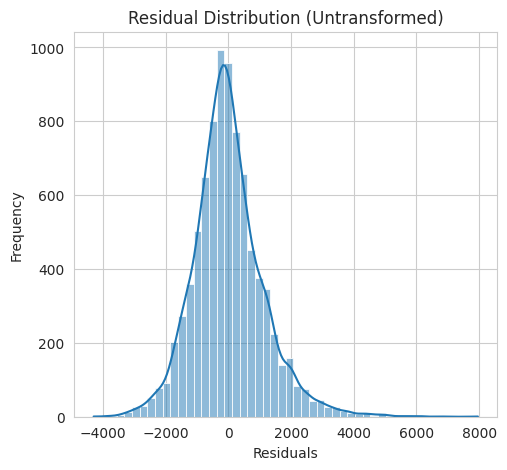

In [59]:
# Calculate and print the R-squared score.
r2_untransformed = r2_score(train_labels, predictions_untransformed)
print(f"\nR-squared score for the untransformed model: {r2_untransformed:.4f}")
# Add other metrics for untransformed linear regression
rmse_untransformed = np.sqrt(mean_squared_error(train_labels, predictions_untransformed))
mae_untransformed = mean_absolute_error(train_labels, predictions_untransformed)

print(f"RMSE value is : {rmse_untransformed}")
print(f"MAE value is : {mae_untransformed}")

# Plot residual distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_untransformed, kde=True, bins=50)
plt.title('Residual Distribution (Untransformed)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

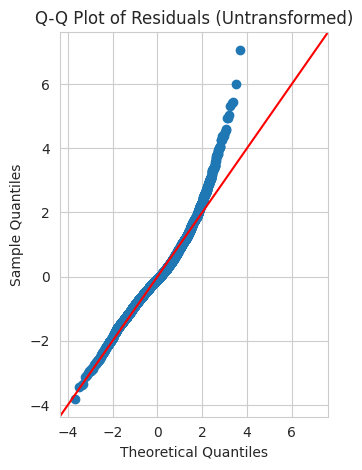

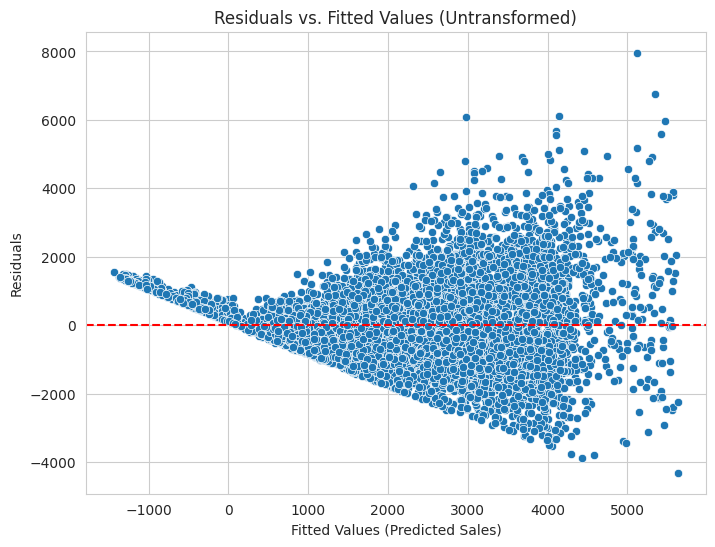

In [60]:
# Plot Q-Q Plot for Normality
plt.subplot(1, 2, 2)
sm.qqplot(residuals_untransformed, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Untransformed)')
plt.tight_layout()
plt.show()

# Plot residuals vs. fitted values for homoscedasticity check
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_untransformed, y=residuals_untransformed)
plt.title('Residuals vs. Fitted Values (Untransformed)')
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

"""- we can observe the heterodescedic pattern in data. we have either left important variable or the output needs transformation"""

In [62]:
# Apply the log transformation to the target variable.
train_labels_transformed = np.log(train_labels + 1)

# Perform feature selection on the scaled features and transformed labels
train_features_selected_transformed = backward_elimination_pvalue(train_features_scaled, train_labels_transformed, train_features.columns)

# Fit the linear regression model with the selected features.
model_transformed = LinearRegression()
model_transformed.fit(train_features_selected_transformed, train_labels_transformed)

# Get predictions and calculate residuals.
predictions_transformed = model_transformed.predict(train_features_selected_transformed)
residuals_transformed = train_labels_transformed - predictions_transformed

# Calculate and print the R-squared score.
r2_transformed = r2_score(train_labels_transformed, predictions_transformed)
print(f"R-squared score for the log-transformed model: {r2_transformed:.4f}")

rmse_transformed = np.sqrt(mean_squared_error(train_labels_transformed, predictions_transformed))
mae_transformed = mean_absolute_error(train_labels_transformed, predictions_transformed)
print(f"MAE (Log Scale): {mae_transformed:.4f}")
print(f"RMSE (log Scale): {rmse_transformed:.4f}")

# Inverse transform for original scale metrics
original_labels = np.exp(train_labels_transformed) - 1
original_predictions = np.exp(predictions_transformed) - 1
rmse_orig_transformed = np.sqrt(mean_squared_error(original_labels, original_predictions))
mae_orig_transformed = mean_absolute_error(original_labels, original_predictions)

print(f"RMSE (Original Scale): {rmse_orig_transformed:.4f}")
print(f"MAE (Original Scale): {mae_orig_transformed:.4f}")


R-squared score for the log-transformed model: 0.7319
MAE (Log Scale): 0.4063
RMSE (log Scale): 0.5256
RMSE (Original Scale): 1114.7079
MAE (Original Scale): 767.3992


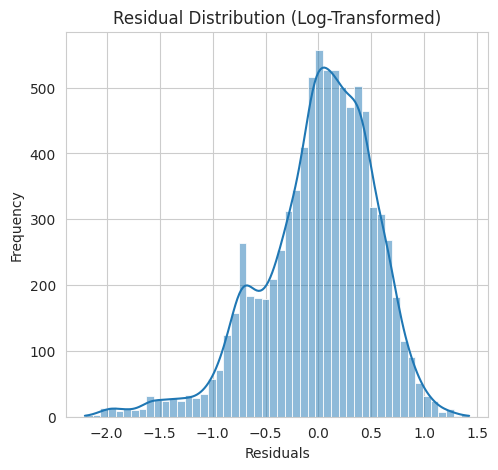

In [63]:
# Plot residual distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_transformed, kde=True, bins=50)
plt.title('Residual Distribution (Log-Transformed)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

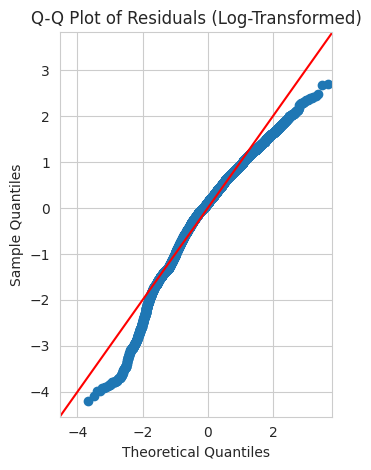

In [64]:
# Plot Q-Q Plot for Normality
plt.subplot(1, 2, 2)
sm.qqplot(residuals_transformed, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Log-Transformed)')
plt.tight_layout()
plt.show()

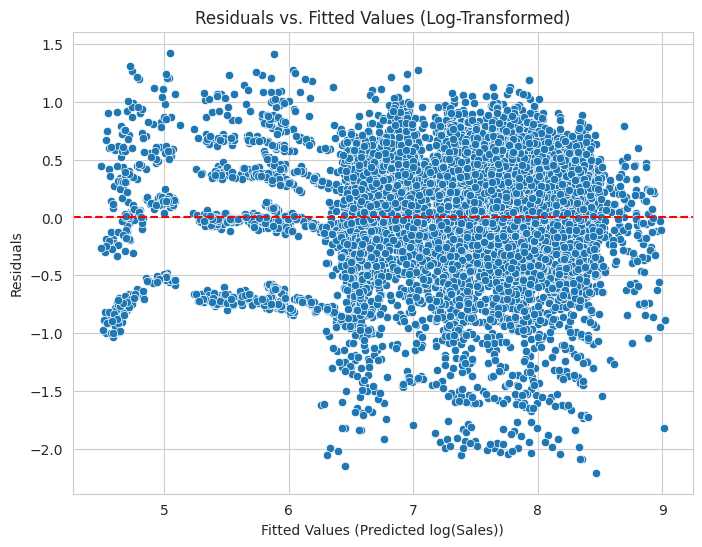

In [65]:
# Plot residuals vs. fitted values for homoscedasticity check
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_transformed, y=residuals_transformed)
plt.title('Residuals vs. Fitted Values (Log-Transformed)')
plt.xlabel('Fitted Values (Predicted log(Sales))')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

"""- Now the residual distribution is constant"""

In [66]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Log transform the target variable. Add 1 to avoid issues with log(0) if present.
train_labels_transformed = np.log(train_labels + 1)

# Standardize the features.
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Initialize the Ridge model with GridSearchCV to find the optimal alpha.
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = GridSearchCV(Ridge(random_state=42), param_grid, cv=5)

train_features_scaled

# Train the model on the transformed data.
print("Training the Ridge model on transformed data...")
ridge_model.fit(train_features_scaled, train_labels_transformed)

print(f"Best alpha for Ridge model: {ridge_model.best_params_['alpha']}")
print(f"Best cross-validation R^2 score: {ridge_model.best_score_:.4f}")

# Get training predictions and metrics for Ridge
ridge_train_preds = ridge_model.predict(train_features_scaled)
r2_ridge = r2_score(train_labels_transformed, ridge_train_preds)
rmse_ridge = np.sqrt(mean_squared_error(train_labels_transformed, ridge_train_preds))
mae_ridge = mean_absolute_error(train_labels_transformed, ridge_train_preds)
# Inverse transform for original scale
original_labels = np.exp(train_labels_transformed) - 1
original_preds_ridge = np.exp(ridge_train_preds) - 1
rmse_orig_ridge = np.sqrt(mean_squared_error(original_labels, original_preds_ridge))
mae_orig_ridge = mean_absolute_error(original_labels, original_preds_ridge)

print(f"\n--- Ridge Regression Metrics ---")
print(f"R-squared Score (Log Scale): {r2_ridge:.4f}")
print(f"RMSE (Log Scale): {rmse_ridge:.4f}")
print(f"MAE (Log Scale): {mae_ridge:.4f}")
print(f"RMSE (Original Scale): {rmse_orig_ridge:.4f}")
print(f"MAE (Original Scale): {mae_orig_ridge:.4f}")

# Make predictions on the preprocessed test data.
ridge_predictions_log = ridge_model.predict(test_features_scaled)

# Inverse transform the predictions to get the original sales values.
ridge_predictions = np.exp(ridge_predictions_log) - 1
ridge_predictions

Training the Ridge model on transformed data...
Best alpha for Ridge model: 10
Best cross-validation R^2 score: 0.7290

--- Ridge Regression Metrics ---
R-squared Score (Log Scale): 0.7319
RMSE (Log Scale): 0.5256
MAE (Log Scale): 0.4063
RMSE (Original Scale): 1114.4290
MAE (Original Scale): 767.2870


array([1580.29584432,  996.03969548,  535.95445303, ..., 1608.25763853,
       3316.16428404,  986.67005656])

In [67]:
# Initialize the Lasso model with GridSearchCV to find the optimal alpha.
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_model = GridSearchCV(Lasso(random_state=42, max_iter=2000), param_grid, cv=5)

# Train the model on the transformed data.
print("Training the Lasso model on transformed data...")
lasso_model.fit(train_features_scaled, train_labels_transformed)

print(f"Best alpha for Lasso model: {lasso_model.best_params_['alpha']}")
print(f"Best cross-validation R^2 score: {lasso_model.best_score_:.4f}")

# Get training predictions and metrics for Lasso
lasso_train_preds = lasso_model.predict(train_features_scaled)
r2_lasso = r2_score(train_labels_transformed, lasso_train_preds)
rmse_lasso = np.sqrt(mean_squared_error(train_labels_transformed, lasso_train_preds))
mae_lasso = mean_absolute_error(train_labels_transformed, lasso_train_preds)
# Inverse transform for original scale
original_preds_lasso = np.exp(lasso_train_preds) - 1
rmse_orig_lasso = np.sqrt(mean_squared_error(original_labels, original_preds_lasso))
mae_orig_lasso = mean_absolute_error(original_labels, original_preds_lasso)

print(f"\n--- Lasso Regression Metrics ---")
print(f"R-squared Score (Log Scale): {r2_lasso:.4f}")
print(f"RMSE (Log Scale): {rmse_lasso:.4f}")
print(f"MAE (Log Scale): {mae_lasso:.4f}")
print(f"RMSE (Original Scale): {rmse_orig_lasso:.4f}")
print(f"MAE (Original Scale): {mae_orig_lasso:.4f}")

# Make predictions on the preprocessed test data.
lasso_predictions_log = lasso_model.predict(test_features_scaled)

lasso_predictions = np.exp(lasso_predictions_log) - 1
lasso_predictions

Training the Lasso model on transformed data...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.751e+00, tolerance: 6.987e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.954e+00, tolerance: 7.023e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.746e+00, tolerance: 7.121e

Best alpha for Lasso model: 0.001
Best cross-validation R^2 score: 0.7293

--- Lasso Regression Metrics ---
R-squared Score (Log Scale): 0.7318
RMSE (Log Scale): 0.5257
MAE (Log Scale): 0.4065
RMSE (Original Scale): 1114.9645
MAE (Original Scale): 767.6167


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+01, tolerance: 8.783e-01
  model = cd_fast.enet_coordinate_descent(


array([1582.43300478, 1019.24016786,  540.95983079, ..., 1606.43031737,
       3285.38782583,  988.57258582])

In [68]:
print(f"Linear Base model R^2 score: {r2_transformed:.4f}")
print(f"Ridge R^2 score: {ridge_model.best_score_:.4f}")
print(f"Lasso R^2 score: {lasso_model.best_score_:.4f}")



Linear Base model R^2 score: 0.7319
Ridge R^2 score: 0.7290
Lasso R^2 score: 0.7293


'Base model is performing good. we can see the log transformed linear model is doing good on train dataset.\nLets go to random forest and see if performance is improving\n'

"""Base model is performing good. we can see the log transformed linear model is doing good on train dataset.
Lets go to random forest and see if performance is improving
"""

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {
    'n_estimators': [100, 200],
    'max_features': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV. `oob_score=True` is crucial for getting the OOB score later.
rf_model = RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Train the model with grid search.
print("Training the Random Forest model with Grid Search...")
grid_search_rf.fit(train_features, train_labels)

# Get the best model from the grid search.
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

# Best parameters found by Grid Search.
print(f"Best parameters found by Grid Search: {grid_search_rf.best_params_}")
# Best cross-validation score (R^2).
print(f"Best R-squared score from cross-validation: {grid_search_rf.best_score_:.4f}")
# Out-of-Bag (OOB) score.
print(f"Out-of-Bag R-squared score: {best_rf_model.oob_score_:.4f}")

# Get training predictions and metrics for Random Forest
rf_train_preds = best_rf_model.predict(train_features)
r2_rf = r2_score(train_labels, rf_train_preds)
rmse_rf = np.sqrt(mean_squared_error(train_labels, rf_train_preds))
mae_rf = mean_absolute_error(train_labels, rf_train_preds)

print(f"\n--- Random Forest Metrics ---")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")

# Make predictions on the preprocessed test data.
rf_predictions = best_rf_model.predict(test_features)
rf_predictions

Training the Random Forest model with Grid Search...
Best parameters found by Grid Search: {'max_features': 0.8, 'min_samples_split': 5, 'n_estimators': 200}
Best R-squared score from cross-validation: 0.5644
Out-of-Bag R-squared score: 0.5648

--- Random Forest Metrics ---
R-squared Score: 0.9053
RMSE: 525.1415
MAE: 360.2763


array([1711.61622798, 1454.93048992,  675.43705737, ..., 1724.9659335 ,
       4891.02089889, 1598.48317937])

"""- More hyper parameter tuning can be done, based on the time constraint not proceeding further on hyperparameter tuning"""


In [70]:
##-----XGBoost Model Building and Prediction ---
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Initialize GridSearchCV.
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Train the model with grid search.
print("Training the XGBoost model with Grid Search...")
grid_search_xgb.fit(train_features, train_labels)

# Get the best model from the grid search.
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model

# --- Step 6: Evaluation and Prediction ---
print("\n--- Model Performance ---")
# Best parameters found by Grid Search.
print(f"Best parameters found by Grid Search: {grid_search_xgb.best_params_}")
# Best cross-validation score (R^2).
print(f"Best R-squared score from cross-validation: {grid_search_xgb.best_score_:.4f}")

# Get training predictions and metrics for XGBoost
xgb_train_preds = best_xgb_model.predict(train_features)
r2_xgb = r2_score(train_labels, xgb_train_preds)
rmse_xgb = np.sqrt(mean_squared_error(train_labels, xgb_train_preds))
mae_xgb = mean_absolute_error(train_labels, xgb_train_preds)

print(f"\n--- XGBoost Metrics ---")
print(f"R-squared Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")

# Make predictions on the preprocessed test data.
xgb_predictions = best_xgb_model.predict(test_features)

xgb_predictions

Training the XGBoost model with Grid Search...

--- Model Performance ---
Best parameters found by Grid Search: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best R-squared score from cross-validation: 0.5942

--- XGBoost Metrics ---
R-squared Score: 0.6136
RMSE: 1060.6544
MAE: 754.1855


array([1630.5297, 1430.6945, 1066.7349, ..., 1807.4934, 3663.8262,
       1309.1074], dtype=float32)

"""- similar to random forest, we need more hyperparameter tuning but because of time constraint stopping here

-- Light GBM implementation
"""

In [71]:
import lightgbm as lgb

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'objective': ['regression']
}

# Initialize GridSearchCV.
lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Train the model with grid search.
print("Training the LightGBM model with Grid Search...")
grid_search_lgbm.fit(train_features, train_labels)

# Get the best model from the grid search.
best_lgbm_model = grid_search_lgbm.best_estimator_
best_lgbm_model

# --- Step 6: Evaluation and Prediction ---
print("\n--- Model Performance ---")
# Best parameters found by Grid Search.
print(f"Best parameters found by Grid Search: {grid_search_lgbm.best_params_}")
# Best cross-validation score (R^2).
print(f"Best R-squared score from cross-validation: {grid_search_lgbm.best_score_:.4f}")

# Get training predictions and metrics for LightGBM
lgbm_train_preds = best_lgbm_model.predict(train_features)
r2_lgbm = r2_score(train_labels, lgbm_train_preds)
rmse_lgbm = np.sqrt(mean_squared_error(train_labels, lgbm_train_preds))
mae_lgbm = mean_absolute_error(train_labels, lgbm_train_preds)

print(f"\n--- LightGBM Metrics ---")
print(f"R-squared Score: {r2_lgbm:.4f}")
print(f"RMSE: {rmse_lgbm:.4f}")
print(f"MAE: {mae_lgbm:.4f}")

# Make predictions on the preprocessed test data.
lgbm_predictions = best_lgbm_model.predict(test_features)
lgbm_predictions

Training the LightGBM model with Grid Search...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 44
[LightGBM] [Info] Start training from score 2181.288915

--- Model Performance ---
Best parameters found by Grid Search: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31, 'objective': 'regression'}
Best R-squared score from cross-validation: 0.5870

--- LightGBM Metrics ---
R-squared Score: 0.6729
RMSE: 975.8622
MAE: 695.2960


array([1734.27535797, 1342.74986215,  620.46121239, ..., 1840.93401616,
       4280.30574778, 1290.29857602])

In [72]:
print("\n\n--- Final Model Performance Summary ---")

# Data for the DataFrame
results = {
    'Model': [
        'Linear Regression (Base)',
        'Linear Regression (Log-Transformed)',
        'Ridge Regression',
         'Lasso Regression',
        'Random Forest',
         'XGBoost',
        'LightGBM'
     ],
    'R2 Score': [
        r2_untransformed,
        r2_transformed,
        r2_ridge,
        r2_lasso,
        grid_search_rf.best_score_,
        grid_search_xgb.best_score_,
        grid_search_lgbm.best_score_
    ],
    'RMSE': [
        rmse_untransformed,
        rmse_orig_transformed, # Use original scale for comparison
        rmse_orig_ridge,
        rmse_orig_lasso,
        rmse_rf,
        rmse_xgb,
        rmse_lgbm
    ],
    'MAE': [
        mae_untransformed,
        mae_orig_transformed, # Use original scale for comparison
        mae_orig_ridge,
         mae_orig_lasso,
        mae_rf,
        mae_xgb,
        mae_lgbm
     ]
}



--- Final Model Performance Summary ---


In [73]:
# Create the DataFrame
metrics_df = pd.DataFrame(results)

# Set the display format for floats to be more readable
pd.set_option('display.float_format', '{:.4f}'.format)

# Display the DataFrame
print(metrics_df)




                                 Model  R2 Score      RMSE      MAE
0             Linear Regression (Base)    0.5640 1126.7259 836.1266
1  Linear Regression (Log-Transformed)    0.7319 1114.7079 767.3992
2                     Ridge Regression    0.7319 1114.4290 767.2870
3                     Lasso Regression    0.7318 1114.9645 767.6167
4                        Random Forest    0.5644  525.1415 360.2763
5                              XGBoost    0.5942 1060.6544 754.1855
6                             LightGBM    0.5870  975.8622 695.2960


'- Few observations:\n\xa0 - Linear Regression with the Log transformed is performing good\n\xa0 - RMSE for RandomForest are low, its a good parameter to notice. We can do more hyperparameter tuning to understand if it works better\n\xa0 - Note these are all train r2 values. we dont have test data y variable. Probably they need real time scenario data how its behaving.\n\nThings proposed:\n- In train data itself we will split as train and test to understand the r2 value. so we are sure of r2 value for test data set\n<<Same steps to be performed again with the train_df itself split for train and test split>>\n'

"""- Few observations:
   - Linear Regression with the Log transformed is performing good
   - RMSE for RandomForest are low, its a good parameter to notice. We can do more hyperparameter tuning to understand if it works better
  - Note these are all train r2 values. we dont have test data y variable. Probably they need real time scenario data how its behaving.

Things proposed:
- In train data itself we will split as train and test to understand the r2 value. so we are sure of r2 value for test data set
<<Same steps to be performed again with the train_df itself split for train and test split>>
"""

In [75]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [76]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_and_predict_with_catboost():
    """
    Performs data cleaning, feature engineering, and trains a CatBoost
    Regressor model to predict Item_Outlet_Sales.
    """
    try:
        # Load the datasets
        print("Loading train.csv and test.csv...")
        train_df = pd.read_csv("/content/train.csv")
        test_df = pd.read_csv("/content/test.csv")

        # Add a source column to identify train and test data
        train_df['source'] = 'train'
        test_df['source'] = 'test'

        # Combine data for consistent preprocessing
        data = pd.concat([train_df, test_df], ignore_index=True)

        # --- Data Cleaning and Feature Engineering ---

        # 1. Impute missing 'Item_Weight' with the mean weight for each item
        print("Imputing missing 'Item_Weight' values...")
        data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)

        # 2. Impute missing 'Outlet_Size'
        # Groceries and Supermarket Type3 have a known Outlet_Size
        print("Imputing missing 'Outlet_Size' values...")
        data['Outlet_Size'].fillna('Small', inplace=True)

        # 3. Correct inconsistent 'Item_Fat_Content' values
        print("Correcting 'Item_Fat_Content' values...")
        data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
            'low fat': 'Low Fat',
            'reg': 'Regular',
            'LF': 'Low Fat'
        })

        # 4. Create a new feature: 'Outlet_Years'
        data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
        data.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

        # 5. Drop 'Item_Type' as it's not a strong predictor after encoding other features
        data.drop('Item_Type', axis=1, inplace=True)

        # 6. Separate data back into train and test
        train_processed = data[data['source'] == 'train'].copy()
        test_processed = data[data['source'] == 'test'].copy()

        # Drop the source column and Item_Outlet_Sales from test data
        train_processed.drop('source', axis=1, inplace=True)
        test_processed.drop(['source', 'Item_Outlet_Sales'], axis=1, inplace=True)

        X_train = train_processed.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
        y_train = train_processed['Item_Outlet_Sales']
        X_test = test_processed.drop('Item_Identifier', axis=1)

        # --- Model Training with CatBoost ---
        print("\nTraining CatBoost Regressor model...")

        # Identify categorical features for CatBoost
        categorical_features_indices = [
            X_train.columns.get_loc(col) for col in [
                'Item_Fat_Content',
                'Outlet_Identifier',
                'Outlet_Size',
                'Outlet_Location_Type',
                'Outlet_Type'
            ]
        ]

        # Initialize CatBoost Regressor with optimized parameters
        model = CatBoostRegressor(
            iterations=1000,
            learning_rate=0.05,
            depth=6,
            loss_function='RMSE',
            eval_metric='RMSE',
            random_seed=42,
            verbose=100
        )

        # Fit the model, passing the categorical feature indices
        model.fit(X_train, y_train, cat_features=categorical_features_indices, plot=False)

        # --- Prediction and Submission ---
        print("\nGenerating predictions for the test data...")
        predictions = model.predict(X_test)

        # Ensure predictions are not negative
        predictions = np.maximum(0, predictions)

        # Create the submission file
        submission_df = pd.DataFrame({
            'Item_Identifier': test_processed['Item_Identifier'],
            'Outlet_Identifier': test_processed['Outlet_Identifier'],
            'Item_Outlet_Sales': predictions
        })

        output_filename = "/content/catboost_submission.csv"
        submission_df.to_csv(output_filename, index=False)

        print(f"\nSuccessfully created submission file: '{output_filename}'")
        print("You can now submit this file and check your new score!")

    except FileNotFoundError as e:
        print(f"Error: A required file was not found. Please ensure 'train.csv' and 'test.csv' are in the same directory.")
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    train_and_predict_with_catboost()


Loading train.csv and test.csv...
Imputing missing 'Item_Weight' values...
Imputing missing 'Outlet_Size' values...
Correcting 'Item_Fat_Content' values...

Training CatBoost Regressor model...
0:	learn: 1659.0069283	total: 56.9ms	remaining: 56.9s


/tmp/ipython-input-624843807.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)
/tmp/ipython-input-624843807.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

100:	learn: 1064.5581807	total: 1.23s	remaining: 10.9s
200:	learn: 1052.7254590	total: 2.81s	remaining: 11.2s
300:	learn: 1039.6687564	total: 3.9s	remaining: 9.05s
400:	learn: 1023.3329334	total: 4.7s	remaining: 7.03s
500:	learn: 1006.2480824	total: 5.6s	remaining: 5.57s
600:	learn: 992.3743526	total: 6.48s	remaining: 4.3s
700:	learn: 978.3434738	total: 7.41s	remaining: 3.16s
800:	learn: 965.0309867	total: 8.32s	remaining: 2.07s
900:	learn: 953.0349039	total: 9.26s	remaining: 1.02s
999:	learn: 941.8060938	total: 10.1s	remaining: 0us

Generating predictions for the test data...

Successfully created submission file: '/content/catboost_submission.csv'
You can now submit this file and check your new score!


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def train_and_predict_with_stacking():
    """
    Performs data cleaning, feature engineering, and trains a stacked
    ensemble model to predict Item_Outlet_Sales.

    The stacked model uses CatBoost and a Neural Network as base models
    and a Ridge model as a meta-learner.
    """
    try:
        # Load the datasets
        print("Loading train.csv and test.csv...")
        train_df = pd.read_csv("/content/train.csv")
        test_df = pd.read_csv("/content/test.csv")

        # Add a source column to identify train and test data
        train_df['source'] = 'train'
        test_df['source'] = 'test'

        # Preserve original IDs for submission
        test_ids = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()

        # Combine data for consistent preprocessing
        data = pd.concat([train_df, test_df], ignore_index=True)

        # --- Data Cleaning and Feature Engineering ---

        # 1. Impute missing 'Item_Weight' with the mean weight for each item
        print("Imputing missing 'Item_Weight' values...")
        data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)

        # 2. Impute missing 'Outlet_Size'
        print("Imputing missing 'Outlet_Size' values...")
        data['Outlet_Size'].fillna('Small', inplace=True)

        # 3. Correct inconsistent 'Item_Fat_Content' values
        print("Correcting 'Item_Fat_Content' values...")
        data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
            'low fat': 'Low Fat',
            'reg': 'Regular',
            'LF': 'Low Fat'
        })

        # 4. Create a new feature: 'Outlet_Years'
        data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
        data.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

        # 5. Drop 'Item_Type' as it's not a strong predictor after encoding other features
        data.drop('Item_Type', axis=1, inplace=True)

        # 6. One-Hot Encoding for categorical variables
        print("One-hot encoding categorical variables...")
        categorical_cols = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
        data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

        # Separate data back into train and test
        train_processed = data_encoded[data_encoded['source'] == 'train'].drop('source', axis=1)
        test_processed = data_encoded[data_encoded['source'] == 'test'].drop(['source', 'Item_Outlet_Sales'], axis=1)

        X_train = train_processed.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
        y_train = train_processed['Item_Outlet_Sales']
        X_test = test_processed.drop('Item_Identifier', axis=1)

        # --- Scaling for Neural Network ---
        print("\nScaling data for Neural Network...")
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # --- Base Models ---
        print("\nTraining base models...")

        # CatBoost Regressor
        cat_model = CatBoostRegressor(
            iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE',
            eval_metric='RMSE', random_seed=42, verbose=0
        )
        cat_model.fit(X_train, y_train, cat_features=np.where(X_train.columns.str.startswith(('Outlet_', 'Item_Fat_Content')))[0])
        cat_preds = cat_model.predict(X_test)

        # Neural Network Regressor
        print("Training Neural Network...")
        nn_model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
        nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
        nn_preds = nn_model.predict(X_test_scaled).flatten()

        # --- Meta-Learner (Ridge Regression) ---
        print("Training meta-learner...")
        meta_features = pd.DataFrame({
            'cat_preds': cat_model.predict(X_train),
            'nn_preds': nn_model.predict(X_train_scaled).flatten()
        })

        meta_learner = Ridge(alpha=1.0)
        meta_learner.fit(meta_features, y_train)

        # --- Final Predictions ---
        print("\nGenerating final stacked predictions...")
        meta_test_features = pd.DataFrame({
            'cat_preds': cat_preds,
            'nn_preds': nn_preds
        })

        final_predictions = meta_learner.predict(meta_test_features)

        # Ensure predictions are not negative
        final_predictions = np.maximum(0, final_predictions)

        # Create the submission file
        submission_df = test_ids.copy()
        submission_df['Item_Outlet_Sales'] = final_predictions

        output_filename = "/content/nn_catboost_stacked_submission.csv"
        submission_df.to_csv(output_filename, index=False)

        print(f"\nSuccessfully created submission file: '{output_filename}'")
        print("You can now submit this file and check your new score!")

    except FileNotFoundError as e:
        print(f"Error: A required file was not found. Please ensure 'train.csv' and 'test.csv' are in the same directory.")
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    train_and_predict_with_stacking()


Loading train.csv and test.csv...
Imputing missing 'Item_Weight' values...
Imputing missing 'Outlet_Size' values...
Correcting 'Item_Fat_Content' values...
One-hot encoding categorical variables...

Scaling data for Neural Network...

Training base models...


/tmp/ipython-input-3697052179.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)
/tmp/ipython-input-3697052179.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Training Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training meta-learner...
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Generating final stacked predictions...

Successfully created submission file: '/content/nn_catboost_stacked_submission.csv'
You can now submit this file and check your new score!


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor

def train_and_predict_with_advanced_features():
    """
    Performs advanced data preprocessing and trains a CatBoost Regressor
    model with the engineered features.
    """
    try:
        # Load the datasets
        print("Loading train.csv and test.csv...")
        train_df = pd.read_csv("/content/train.csv")
        test_df = pd.read_csv("/content/test.csv")

        # Add a source column to identify train and test data
        train_df['source'] = 'train'
        test_df['source'] = 'test'

        # Preserve original IDs for submission
        test_ids = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()

        # Combine data for consistent preprocessing
        data = pd.concat([train_df, test_df], ignore_index=True)

        # --- Data Cleaning and Feature Engineering ---
        print("Performing data preprocessing...")

        # Impute missing 'Item_Weight' and 'Outlet_Size'
        data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)
        data['Outlet_Size'].fillna('Small', inplace=True)

        # Correct 'Item_Fat_Content' values
        data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
            'low fat': 'Low Fat',
            'reg': 'Regular',
            'LF': 'Low Fat'
        })

        # Handle 'Item_Visibility'
        visibility_means = data.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
        data['Item_Visibility'] = data['Item_Visibility'].mask(data['Item_Visibility'] == 0, visibility_means)

        # Create 'Outlet_Years' feature
        data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
        data.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

        # Create 'MRP_Category' feature by binning Item_MRP
        data['MRP_Category'] = pd.cut(data['Item_MRP'], bins=[0, 100, 200, 300], labels=['Low', 'Medium', 'High'])

        # Create 'Outlet_Item_Type' interaction feature
        data['Outlet_Item_Type'] = data['Outlet_Identifier'] + '_' + data['Item_Type']

        # Drop original features that have been engineered
        data.drop(['Item_Identifier', 'Item_Type'], axis=1, inplace=True)

        # --- Encoding Categorical Variables ---
        print("Encoding categorical variables...")

        categorical_cols = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
                            'Outlet_Location_Type', 'Outlet_Type', 'MRP_Category', 'Outlet_Item_Type']

        for col in categorical_cols:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str)) # Convert to string to avoid issues

        # Separate data back into train and test
        train_processed = data[data['source'] == 'train'].drop('source', axis=1)
        test_processed = data[data['source'] == 'test'].drop(['source', 'Item_Outlet_Sales'], axis=1)

        X_train = train_processed.drop('Item_Outlet_Sales', axis=1)
        y_train = train_processed['Item_Outlet_Sales']
        X_test = test_processed.copy()

        # Get the indices of the categorical columns for CatBoost
        cat_feature_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

        # --- Model Training with Tuned CatBoost ---
        print("\nBeginning final model training...")

        cat_model = CatBoostRegressor(
            iterations=1500,
            learning_rate=0.03,
            depth=6,
            l2_leaf_reg=3,
            loss_function='RMSE',
            eval_metric='RMSE',
            random_seed=42,
            verbose=0,
            cat_features=cat_feature_indices
        )

        cat_model.fit(X_train, y_train)

        # --- Final Predictions ---
        print("\nGenerating final predictions...")
        final_predictions = cat_model.predict(X_test)

        # Ensure predictions are not negative
        final_predictions = np.maximum(0, final_predictions)

        # Create the submission file
        submission_df = test_ids.copy()
        submission_df['Item_Outlet_Sales'] = final_predictions

        output_filename = "/content/final_advanced_submission.csv"
        submission_df.to_csv(output_filename, index=False)

        print(f"\nSuccessfully created submission file: '{output_filename}'")

    except FileNotFoundError as e:
        print(f"Error: A required file was not found. Please ensure 'train.csv' and 'test.csv' are in the same directory.")
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    train_and_predict_with_advanced_features()


Loading train.csv and test.csv...
Performing data preprocessing...
Encoding categorical variables...

Beginning final model training...


/tmp/ipython-input-2606396700.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)
/tmp/ipython-input-2606396700.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp


Generating final predictions...

Successfully created submission file: '/content/final_advanced_submission.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from scipy.stats import uniform, randint

def train_and_predict_with_advanced_tuning():
    """
    Performs advanced feature engineering and trains a CatBoost Regressor
    model with a randomized hyperparameter search.
    """
    try:
        # Load the datasets
        print("Loading train.csv and test.csv...")
        train_df = pd.read_csv("/content/train.csv")
        test_df = pd.read_csv("/content/test.csv")

        # Add a source column to identify train and test data
        train_df['source'] = 'train'
        test_df['source'] = 'test'

        # Preserve original IDs for submission
        test_ids = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()

        # Combine data for consistent preprocessing
        data = pd.concat([train_df, test_df], ignore_index=True)

        # --- Data Cleaning and Feature Engineering ---
        print("Performing advanced data preprocessing and feature engineering...")

        # Impute missing 'Item_Weight' and 'Outlet_Size'
        data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)
        data['Outlet_Size'].fillna('Small', inplace=True)

        # Correct 'Item_Fat_Content' values
        data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
            'low fat': 'Low Fat',
            'reg': 'Regular',
            'LF': 'Low Fat'
        })

        # Handle 'Item_Visibility'
        visibility_means = data.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
        data['Item_Visibility'] = data['Item_Visibility'].mask(data['Item_Visibility'] == 0, visibility_means)

        # Create 'Outlet_Years' feature
        data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
        data.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

        # Create 'MRP_Category' feature by binning Item_MRP
        data['MRP_Category'] = pd.cut(data['Item_MRP'], bins=[0, 100, 200, 300], labels=['Low', 'Medium', 'High'])

        # Create 'Outlet_Item_Type' interaction feature
        data['Outlet_Item_Type'] = data['Outlet_Identifier'] + '_' + data['Item_Type']

        # Drop original features that have been engineered
        data.drop(['Item_Identifier', 'Item_Type'], axis=1, inplace=True)

        # --- Encoding Categorical Variables ---
        print("Encoding categorical variables...")

        categorical_cols = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
                            'Outlet_Location_Type', 'Outlet_Type', 'MRP_Category', 'Outlet_Item_Type']

        for col in categorical_cols:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))

        # Separate data back into train and test
        train_processed = data[data['source'] == 'train'].drop('source', axis=1)
        test_processed = data[data['source'] == 'test'].drop(['source', 'Item_Outlet_Sales'], axis=1)

        X_train = train_processed.drop('Item_Outlet_Sales', axis=1)
        y_train = train_processed['Item_Outlet_Sales']
        X_test = test_processed.copy()

        # Get the indices of the categorical columns for CatBoost
        cat_feature_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

        # --- Hyperparameter Tuning with Randomized Search ---
        print("\nBeginning randomized hyperparameter tuning...")

        cat_model = CatBoostRegressor(
            loss_function='RMSE',
            eval_metric='RMSE',
            random_seed=42,
            verbose=0,
            cat_features=cat_feature_indices
        )

        # Define the parameter search space
        param_dist = {
            'iterations': randint(500, 2000),
            'learning_rate': uniform(0.01, 0.1),
            'depth': randint(4, 10),
            'l2_leaf_reg': randint(1, 10),
        }

        random_search = RandomizedSearchCV(
            estimator=cat_model,
            param_distributions=param_dist,
            n_iter=50, # Number of different parameter combinations to try
            cv=3,
            verbose=2,
            random_state=42,
            n_jobs=-1
        )

        random_search.fit(X_train, y_train)

        print("\nBest parameters found: ", random_search.best_params_)
        best_model = random_search.best_estimator_

        # --- Final Predictions ---
        print("\nGenerating final predictions with the best model...")
        final_predictions = best_model.predict(X_test)

        # Ensure predictions are not negative
        final_predictions = np.maximum(0, final_predictions)

        # Create the submission file
        submission_df = test_ids.copy()
        submission_df['Item_Outlet_Sales'] = final_predictions

        output_filename = "/content/final_tuned_submission.csv"
        submission_df.to_csv(output_filename, index=False)

        print(f"\nSuccessfully created submission file: '{output_filename}'")

    except FileNotFoundError as e:
        print(f"Error: A required file was not found. Please ensure 'train.csv' and 'test.csv' are in the same directory.")
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    train_and_predict_with_advanced_tuning()


Loading train.csv and test.csv...
Performing advanced data preprocessing and feature engineering...
Encoding categorical variables...

Beginning randomized hyperparameter tuning...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/tmp/ipython-input-2363283348.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)
/tmp/ipython-input-2363283348.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp